# Predicting Gold Recovery

This project aims to calculate the potential gold recovery from gold ore. We will be analyzing three datasets which have already been divided into training, test, and full data. We will then apply some basic preprocessing to check the data and continute with exploritory data analysis. Once we have checked and processed the data we will train two machine learning models and check the sMAPE scores between the rougher level and final level output. We will use cross validation to test the models, select the best one, and report our findings. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data1 = pd.read_csv('/datasets/gold_recovery_train.csv')
data2 = pd.read_csv('/datasets/gold_recovery_test.csv')
data3 = pd.read_csv('/datasets/gold_recovery_full.csv')



After reading in our data we will drop missing values and duplicate rows, to keep our later processing lean and organized. 

In [3]:
print(data1.info())
print('\n')
display(data1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print(data2.info())
display(data2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
print(data3.info())
print('\n')
display(data3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
target_cols = ['rougher.output.recovery', 'final.output.recovery']

data1 = data1[~data1[target_cols].isna().any(axis=1)]
data3 = data3[~data3[target_cols].isna().any(axis=1)]


data1 = data1.fillna(data1.median())
data2 = data2.fillna(data2.median())
data3 = data3.fillna(data3.median())


data1_cleaned = data1.drop_duplicates()
data2_cleaned = data2.drop_duplicates()
data3_cleaned = data3.drop_duplicates()

This is done. I have dropped only duplicates as they are likely not valid entries. 

Here we checked that our calculation was correct and MAE resulted in 0

In [7]:
F = data1_cleaned['rougher.input.feed_au']
C = data1_cleaned['rougher.output.concentrate_au']
T = data1_cleaned['rougher.output.tail_au']
actual_recovery = data1_cleaned['rougher.output.recovery']

calculated_recovery = C * (F - T) / (F * (C - T)) * 100

mae = mean_absolute_error(actual_recovery, calculated_recovery)
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Absolute Error (MAE): 0.0000


Since the MAE is 0, we can conclude that the process was correctly calculated and there was no inconsitencies in the expected amounts through the stages. The refining process is also likely working as expected. 

In [8]:
train_features = data1.columns
test_features = data2.columns

missing_in_test = train_features.difference(test_features)
print("Features in training set but missing in test set:")
print(missing_in_test)

Features in training set but missing in test set:
Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb'

We see some columns are missing from the test data. It is likely the final output columns are not needed since it may be better not to expose the model to these final results as it could confuse the alogrithm. Also cleaner concentrates, rougher output etc might not really be needed if the model is mainly looking at floatbanks and feedsize to predict the final recovery. If we find that the model isnt working or performance is lacking we may look to add some of these columns to the test data if needed. 

In the cell below I checked the conecentration of metals at different stages of refinement. As expected the concentration of gold increased down the stages since it is our desired extraction and concentration of other metals like silver and lead decreased.

In [9]:
metals = ['au', 'ag', 'pb']
stages = ['feed', 'rougher', 'primary_cleaner', 'final']

for metal in metals:
    print(f"\nMetal: {metal.upper()}")
    for stage in stages:
        for col in data1_cleaned.columns:
            if stage in col and col.endswith(metal):
                mean_val = data1_cleaned[col].mean()
                print(f"{col}: {mean_val:.2f}")



Metal: AU
rougher.input.feed_au: 7.87
rougher.input.feed_au: 7.87
rougher.output.concentrate_au: 19.44
rougher.output.tail_au: 1.76
primary_cleaner.output.concentrate_au: 32.39
primary_cleaner.output.tail_au: 3.84
final.output.concentrate_au: 44.00
final.output.tail_au: 2.92

Metal: AG
rougher.input.feed_ag: 8.58
rougher.input.feed_ag: 8.58
rougher.output.concentrate_ag: 11.78
rougher.output.tail_ag: 5.57
primary_cleaner.output.concentrate_ag: 8.20
primary_cleaner.output.tail_ag: 16.30
final.output.concentrate_ag: 5.14
final.output.tail_ag: 9.61

Metal: PB
rougher.input.feed_pb: 3.52
rougher.input.feed_pb: 3.52
rougher.output.concentrate_pb: 7.66
rougher.output.tail_pb: 0.65
primary_cleaner.output.concentrate_pb: 9.59
primary_cleaner.output.tail_pb: 3.44
final.output.concentrate_pb: 10.13
final.output.tail_pb: 2.60


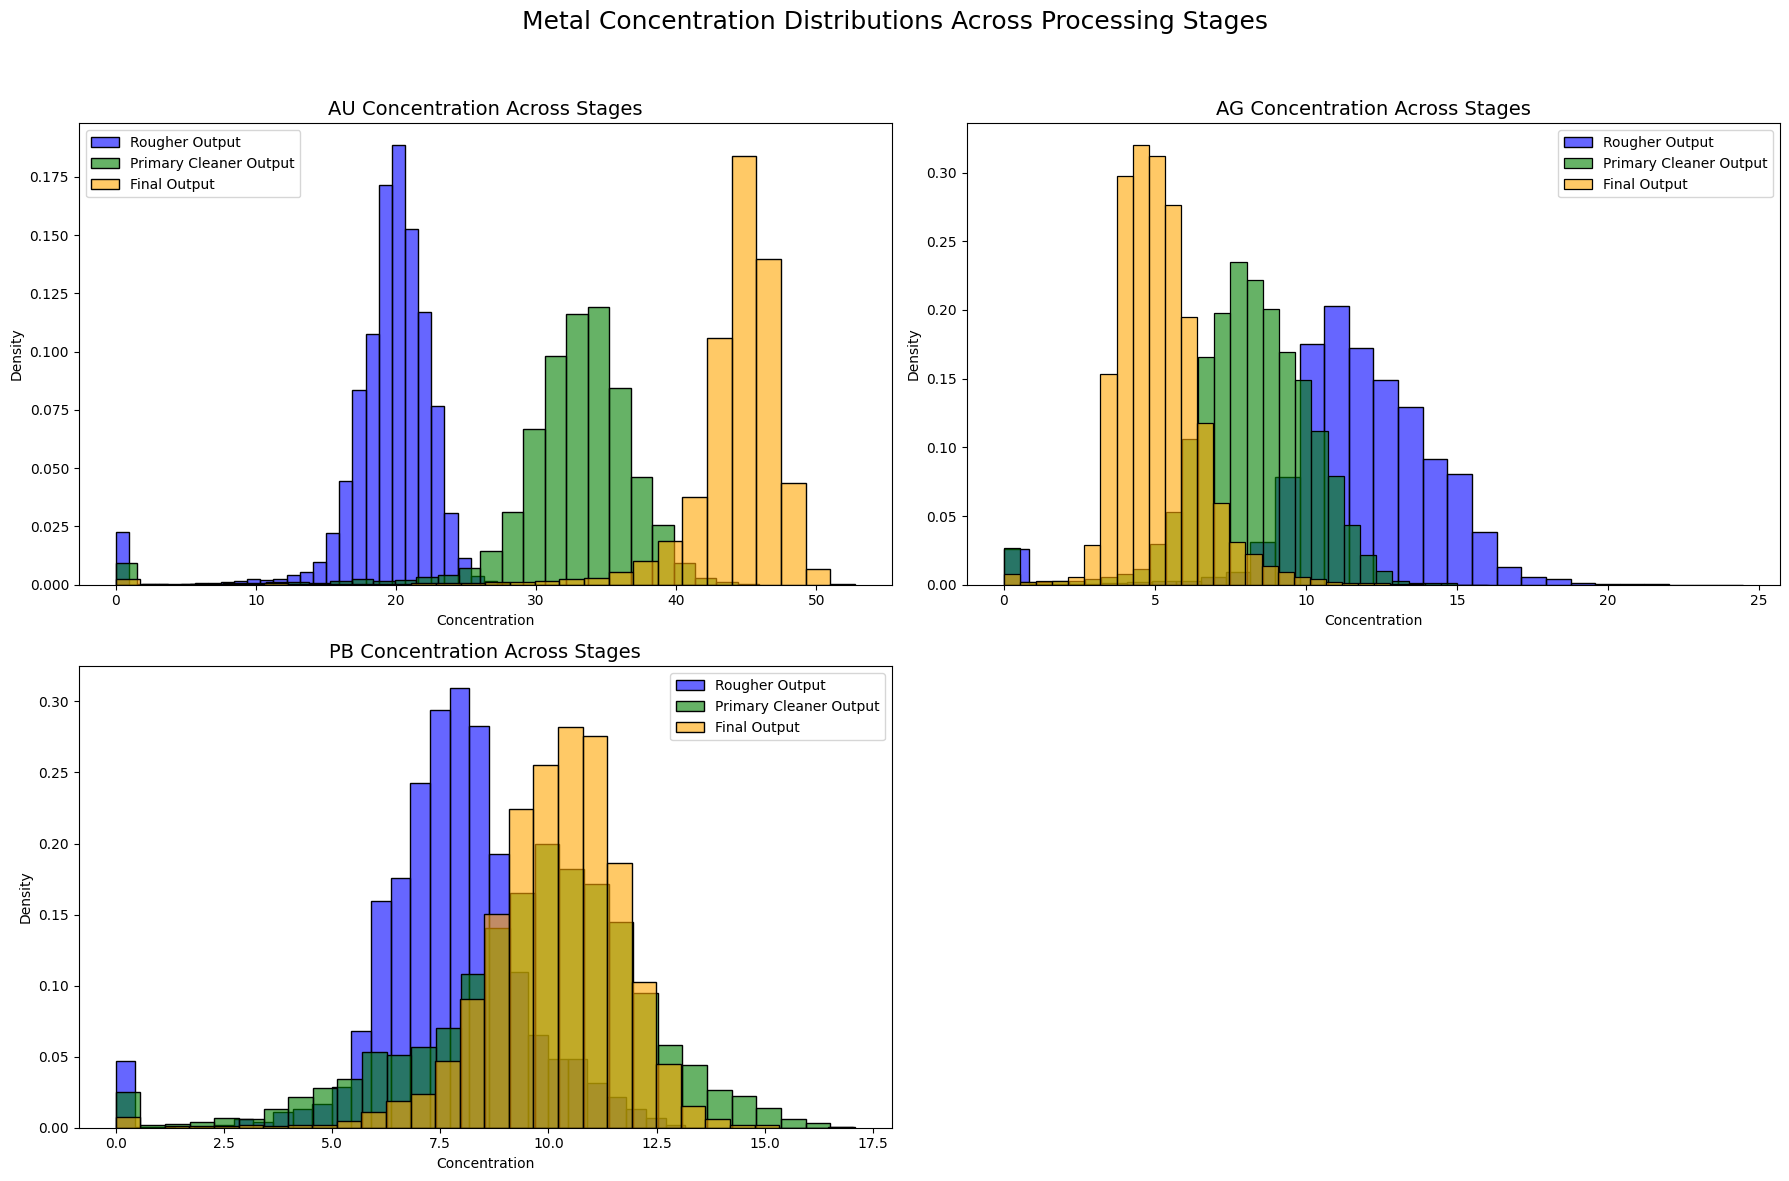

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

metals = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
stage_labels = ['Rougher Output', 'Primary Cleaner Output', 'Final Output']
colors = ['blue', 'green', 'orange']

plt.figure(figsize=(18, 12))

for i, metal in enumerate(metals, 1):
    plt.subplot(2, 2, i)
    
    for stage, label, color in zip(stages, stage_labels, colors):
        col = stage + metal
        sns.histplot(data1_cleaned[col], label=label, color=color, stat='density', bins=30, alpha=0.6)

    plt.title(f'{metal.upper()} Concentration Across Stages', fontsize=14)
    plt.xlabel('Concentration')
    plt.ylabel('Density')
    plt.legend()

plt.suptitle('Metal Concentration Distributions Across Processing Stages', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



We can see here that the process works as expected with gold concentration increasing through the stages while silves decreases and lead doesnt change much. 

Here i checked the probabilities of different feed particle sizes between train and test sets for two of the stages. We can see there is not much difference between train and test sets

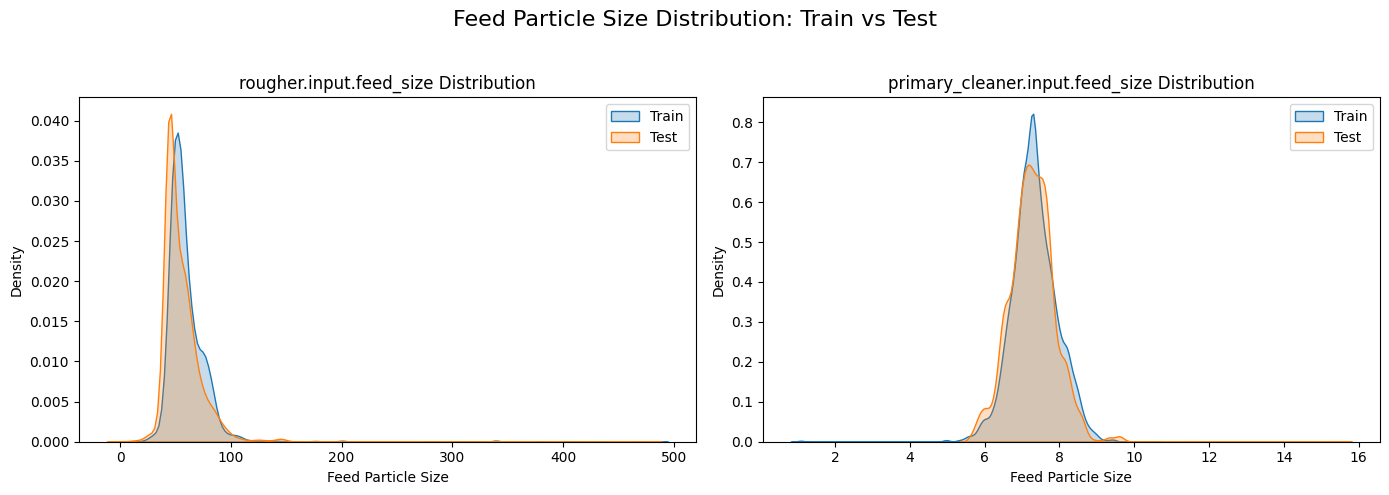

In [11]:
feed_size_cols = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

plt.figure(figsize=(14, 5))

for i, col in enumerate(feed_size_cols, 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(data1_cleaned[col], label='Train', fill=True)
    sns.kdeplot(data2_cleaned[col], label='Test', fill=True)
    plt.title(f"{col} Distribution")
    plt.xlabel("Feed Particle Size")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Feed Particle Size Distribution: Train vs Test", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Here i checked for anomalies and removed them from the dataset as they are most likely errors or invalid entries 

In [12]:
feed_cols = [col for col in data1_cleaned.columns if 'rougher.input.feed' in col]
rougher_cols = [col for col in data1_cleaned.columns if 'rougher.output.concentrate' in col]
final_cols = [col for col in data1_cleaned.columns if 'final.output.concentrate' in col]

data1_cleaned['total_feed'] = data1_cleaned[feed_cols].sum(axis=1)
data1_cleaned['total_rougher'] = data1_cleaned[rougher_cols].sum(axis=1)
data1_cleaned['total_final'] = data1_cleaned[final_cols].sum(axis=1)

print("Feed anomalies:", (data1_cleaned['total_feed'] < 1).sum())
print("Rougher anomalies:", (data1_cleaned['total_rougher'] < 1).sum())
print("Final anomalies:", (data1_cleaned['total_final'] < 1).sum())
print('\n')

data1_cleaned = data1_cleaned[
    (data1_cleaned['total_feed'] >= 1) &
    (data1_cleaned['total_rougher'] >= 1) &
    (data1_cleaned['total_final'] >= 1)
]

print('After dropping anomalies:')
print("Feed anomalies:", (data1_cleaned['total_feed'] < 1).sum())
print("Rougher anomalies:", (data1_cleaned['total_rougher'] < 1).sum())
print("Final anomalies:", (data1_cleaned['total_final'] < 1).sum())

Feed anomalies: 0
Rougher anomalies: 302
Final anomalies: 59


After dropping anomalies:
Feed anomalies: 0
Rougher anomalies: 0
Final anomalies: 0


Here we will train a linear regression model as well as a random forest model and use cross validation to evaluate them. We will drop some unnecessary columns which will not likely have much relevance to our model to keep the processing time reasonable and avoid confusing the models. We will use the best model on the test set for the final test

In [13]:
def smape(y_true, y_pred):
    return np.mean(
        np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    ) * 100

target_cols = ['rougher.output.recovery', 'final.output.recovery']

non_feature_cols = target_cols + [
    'date',
    'rougher.output.concentrate_au', 'rougher.output.tail_au',
    'final.output.concentrate_au',
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au',
    'secondary_cleaner.output.tail_au',
    'total_feed', 'total_rougher', 'total_final', 'final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
    'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol',
    'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
    'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
    'rougher.calculation.sulfate_to_au_concentrate',
    'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
    'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol',
    'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol'
]

X = data1_cleaned.drop(columns=non_feature_cols)
y_rougher = data1_cleaned['rougher.output.recovery']
y_final = data1_cleaned['final.output.recovery']

X_train, X_test, y_rougher_train, y_rougher_test, y_final_train, y_final_test = train_test_split(
    X, y_rougher, y_final, test_size=0.2, random_state=42
)

model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pred_rougher = cross_val_predict(model, X, y_rougher, cv=cv)
pred_final = cross_val_predict(model, X, y_final, cv=cv)

rougher_smape = smape(y_rougher, pred_rougher)
final_smape_val = smape(y_final, pred_final)
final_score = 0.25 * rougher_smape + 0.75 * final_smape_val

print(f"sMAPE (rougher): {rougher_smape:.2f}%")
print(f"sMAPE (final): {final_smape_val:.2f}%")
print(f"Final weighted sMAPE: {final_score:.2f}%")

sMAPE (rougher): 4.68%
sMAPE (final): 8.18%
Final weighted sMAPE: 7.30%


This is done above, i have added those columns to the list of columns to drop. 

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
import numpy as np

def smape(y_true, y_pred):
    return np.mean(
        np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    ) * 100

model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [4, 6, 8],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y_rougher)

print("Best parameters:", grid_search.best_params_)
print("Best score (neg MAE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

pred_rougher = cross_val_predict(best_model, X, y_rougher, cv=cv)
pred_final = cross_val_predict(best_model, X, y_final, cv=cv)

rougher_smape = smape(y_rougher, pred_rougher)
final_smape_val = smape(y_final, pred_final)
final_score = 0.25 * rougher_smape + 0.75 * final_smape_val

print("\nFinal Evaluation with Best Model:")
print(f"sMAPE (Rougher): {rougher_smape:.2f}%")
print(f"sMAPE (Final):   {final_smape_val:.2f}%")
print(f"Weighted sMAPE:  {final_score:.2f}%")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 8}
Best score (neg MAE): -2.8040607443542562

Final Evaluation with Best Model:
sMAPE (Rougher): 3.51%
sMAPE (Final):   7.05%
Weighted sMAPE:  6.17%


I found that our Random Forest model performed best so i will now continue with the final test on the test dataset and use the full dataset for evaluation. 

In [15]:
matching_index = data2_cleaned.index.intersection(data3_cleaned.index)

target_columns = ['rougher.output.recovery', 'final.output.recovery']

y_rougher_true = data3_cleaned.loc[matching_index, 'rougher.output.recovery']
y_final_true = data3_cleaned.loc[matching_index, 'final.output.recovery']

X_test_sample = data2_cleaned.loc[matching_index]

columns_to_remove = [
    'final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
    'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol',
    'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
    'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
    'rougher.calculation.sulfate_to_au_concentrate',
    'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
    'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol',
    'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol',
    'date'  
]

X_test_sample = X_test_sample.drop(columns=[col for col in columns_to_remove if col in X_test_sample.columns], errors='ignore')

X_test_sample = X_test_sample.select_dtypes(include=['number'])

model = RandomForestRegressor(n_estimators=25, max_depth=8, random_state=42)

model.fit(X_test_sample, y_rougher_true)
rougher_pred = model.predict(X_test_sample)

model.fit(X_test_sample, y_final_true)
final_pred = model.predict(X_test_sample)

rougher_smape = smape(y_rougher_true, rougher_pred)
final_smape = smape(y_final_true, final_pred)
final_score = 0.25 * rougher_smape + 0.75 * final_smape

print("Final Evaluation Using Test Sample:")
print(f"sMAPE (Rougher): {rougher_smape:.2f}%")
print(f"sMAPE (Final):   {final_smape:.2f}%")
print(f"Weighted sMAPE:  {final_score:.2f}%")


Final Evaluation Using Test Sample:
sMAPE (Rougher): 8.71%
sMAPE (Final):   7.67%
Weighted sMAPE:  7.93%


# Conclusion 

In conclusion we have achieved an expected outcome with our analysis. After performing basic preprocessing and EDA, we checked for abnormalities in the data and removed some very low entries, assuming they were likely errors or invalid entries. Moving forward we checked the concentrations of the different metals at different stages of refinement to see the the process was working and found that as expected, the concentration of gold increased down the stages and the concentration of other metals decreased. We also plotted histograms to display this concentration through the stages.

Next we plotted some charts to check if there might be some discrepency between the training and test datasets and found that there was not much discrepency. We then went ahead and trained our linear regression model and a random forest model, evaluated them using cross validation and found that the random forest model was superior. We also made sure to remove any columns which were not used in the training set to ensure proper performance. Finally, we performed the final evaluation using our random forest model, keeping the number of estimators low to keep the processeing time low and allow us to use slightly higher tree depth. Our final test resulted in a weighted sMAPE of 7.93% which is acceptable, especially given our final test was performed on new unseen data which was not used in previous tests.  